In [1]:
import mglearn
from mglearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, ShuffleSplit, GroupKFold

In [2]:
iris = load_iris()

In [3]:
lr = LogisticRegression()

In [4]:
score = cross_val_score(lr, iris.data, iris.target)
print('교차 검증 점수 : {}'.format(score))

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
print('교차 검증 평균 점수 : {:.2f}'.format(score.mean()))

교차 검증 평균 점수 : 0.97


In [6]:
print('iris 레이블 :\n{}'.format(iris.target))

iris 레이블 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


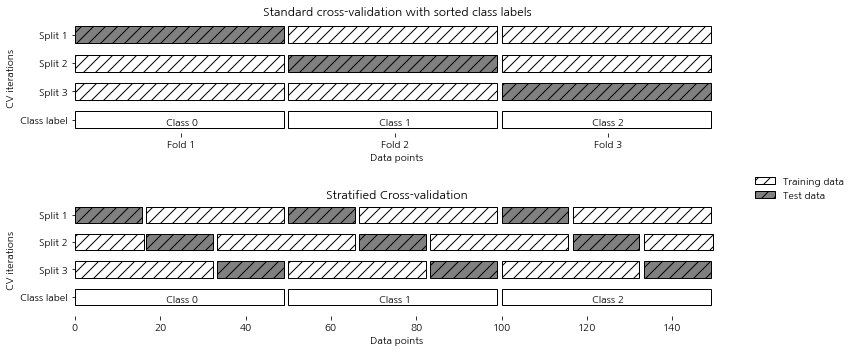

In [7]:
# 계층별 k 교차검증
mglearn.plots.plot_stratified_cross_validation()

In [8]:
# 교차 검증 상세 옵션
kfold = KFold(n_splits=5)

In [9]:
print('교차 검증 점수 :\n{}'.format(cross_val_score(lr, iris.data, iris.target, cv=kfold)))

교차 검증 점수 :
[1.         1.         0.86666667 0.93333333 0.83333333]


In [10]:
# 셔플을 이용한 교차 검증
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
print('교차 검증 점수 :\n{}'.format(cross_val_score(lr, iris.data, iris.target, cv=kfold)))

교차 검증 점수 :
[1.         0.83333333 1.         1.         0.93333333]


In [11]:
loo = LeaveOneOut()
score = cross_val_score(lr, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수 : ', len(score))
print('평균 정확도 : {:.2f}'.format(score.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


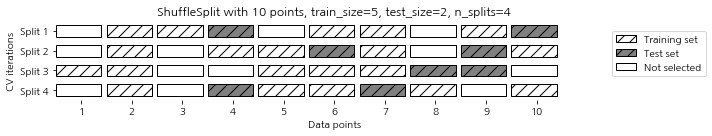

In [12]:
# 임의 분할 교차 검증
mglearn.plots.plot_shuffle_split()

In [13]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
score = cross_val_score(lr, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수 : \n{}'.format(score))

교차 검증 점수 : 
[0.94666667 0.97333333 0.98666667 0.92       0.98666667 0.93333333
 0.92       0.94666667 0.98666667 0.97333333]


In [14]:
# 그룹별 교차 검증
x, y = make_blobs(n_samples=12, random_state=1)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
score = cross_val_score(lr, x, y, groups, cv=GroupKFold(n_splits=3))
print('교차 검증 점수 : \n{}'.format(score))

교차 검증 점수 : 
[1. 1. 1.]


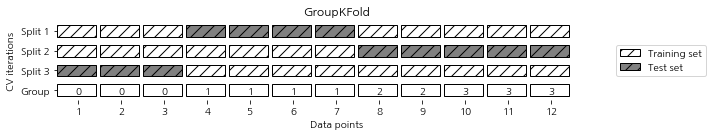

In [15]:
mglearn.plots.plot_group_kfold()